#MSPA PREDICT 400

##Discussion Topic: Week 7 Methods of Maximization and Minimization

###Introduction

This document presents the results of the seventh weeks discussion topic for the Masters of Science in Predictive Analytics course: PREDICT 400. This assessment required the student to compare approaches to maximization and minimization problems in Chapter's 13 and 14 of <a href = "http://www.amazon.com/Finite-Mathematics-Calculus-Applications-9th/dp/0321749081/ref=sr_1_2?s=books&ie=UTF8&qid=1455512383&sr=1-2&keywords=lial+finite+mathematics">Lial</a> to those problems in Chapter's three and four.

###Linear Programming vs. Gradient Methods for Optimization

Chapters three and four of the text focus on employing optimization techniques (namely graphical means and the simplex method) to solve linear programming problems. While chapters 13 and 14 focus on the use of gradient methods (or derivates) to solve non-linear problems.

####Linear Programming Problem/Methods

Linear programming problems involve the optimization of linear objective function subject to linear equality/inequality constraints. Here, the constraints define a 'feasible region' which contains possible combinations of independent variable choices for the objective variable function. The choice of independent variables (within the feasible region) which maximizes or minimizes the objective function is the optima.

For linear programming problems with two (or potentially three independent variables), graphical means may be used to find the optima. See my submission for the third weeks discussion topic for an example. Alternatively, for problems with more than two independent variables, the simplex method may be used. This method starts with an evaluation of the objective function based on a corner point within the feasible region. It then provides a systematic way to select other corner points within the feasible region in an attempt to move towards to optima. The below shows an example of employing the simplex method via tableaus using Python.

In [1]:
#Source: http://hubpages.com/technology/Simplex-Algorithm-in-Python

from __future__ import division
from numpy import *
 
class Tableau:
 
    def __init__(self, obj):
        self.obj = [1] + obj
        self.rows = []
        self.cons = []
 
    def add_constraint(self, expression, value):
        self.rows.append([0] + expression)
        self.cons.append(value)
 
    def _pivot_column(self):
        low = 0
        idx = 0
        for i in range(1, len(self.obj)-1):
            if self.obj[i] < low:
                low = self.obj[i]
                idx = i
        if idx == 0: return -1
        return idx
 
    def _pivot_row(self, col):
        rhs = [self.rows[i][-1] for i in range(len(self.rows))]
        lhs = [self.rows[i][col] for i in range(len(self.rows))]
        ratio = []
        for i in range(len(rhs)):
            if lhs[i] == 0:
                ratio.append(99999999 * abs(max(rhs)))
                continue
            ratio.append(rhs[i]/lhs[i])
        return argmin(ratio)
 
    def display(self):
        print('\n', matrix([self.obj] + self.rows))
 
    def _pivot(self, row, col):
        e = self.rows[row][col]
        self.rows[row] /= e
        for r in range(len(self.rows)):
            if r == row: continue
            self.rows[r] = self.rows[r] - self.rows[r][col]*self.rows[row]
        self.obj = self.obj - self.obj[col]*self.rows[row]
 
    def _check(self):
        if min(self.obj[1:-1]) >= 0: return 1
        return 0
         
    def solve(self):
 
        # build full tableau
        for i in range(len(self.rows)):
            self.obj += [0]
            ident = [0 for r in range(len(self.rows))]
            ident[i] = 1
            self.rows[i] += ident + [self.cons[i]]
            self.rows[i] = array(self.rows[i], dtype=float)
        self.obj = array(self.obj + [0], dtype=float)
 
        # solve
        self.display()
        while not self._check():
            c = self._pivot_column()
            r = self._pivot_row(c)
            self._pivot(r,c)
            print('\npivot column: %s\npivot row: %s'%(c+1,r+2))
            self.display()

In [2]:
if __name__ == '__main__':
 
    """
    max z = 2x + 3y + 2z
    st
    2x + y + z <= 4
    x + 2y + z <= 7
    z          <= 5
    x,y,z >= 0
    """
 
    t = Tableau([-2,-3,-2])
    t.add_constraint([2, 1, 1], 4)
    t.add_constraint([1, 2, 1], 7)
    t.add_constraint([0, 0, 1], 5)
    t.solve()


 [[ 1. -2. -3. -2.  0.  0.  0.  0.]
 [ 0.  2.  1.  1.  1.  0.  0.  4.]
 [ 0.  1.  2.  1.  0.  1.  0.  7.]
 [ 0.  0.  0.  1.  0.  0.  1.  5.]]

pivot column: 3
pivot row: 3

 [[  1.   -0.5   0.   -0.5   0.    1.5   0.   10.5]
 [  0.    1.5   0.    0.5   1.   -0.5   0.    0.5]
 [  0.    0.5   1.    0.5   0.    0.5   0.    3.5]
 [  0.    0.    0.    1.    0.    0.    1.    5. ]]

pivot column: 2
pivot row: 2

 [[  1.           0.           0.          -0.33333333   0.33333333
    1.33333333   0.          10.66666667]
 [  0.           1.           0.           0.33333333   0.66666667
   -0.33333333   0.           0.33333333]
 [  0.           0.           1.           0.33333333  -0.33333333
    0.66666667   0.           3.33333333]
 [  0.           0.           0.           1.           0.           0.
    1.           5.        ]]

pivot column: 4
pivot row: 2

 [[  1.   1.   0.   0.   1.   1.   0.  11.]
 [  0.   3.   0.   1.   2.  -1.   0.   1.]
 [  0.  -1.   1.   0.  -1.   1.   0.   3.

####Gradient Methods

Chapter's 13 and 14 of the text focus on employing gradient method's in an analytical fashion in order to find the optima of non-linear problems. Under this method, for a given objective function, the first derivative of the objective function is found through differentiation with its value equal to zero at the optima. Again, this method is suitable for finding the optima for non-linear problems. An example is shown below using the 'sympy' library in Python.

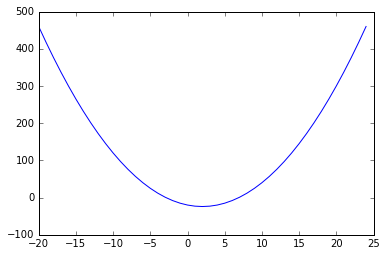

function: x**2 - 4*x - 20
first derivative: 2*x - 4
make equal to zero and solve: [2]


In [3]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = symbols('x')

def func(x):
    return x**2 - 4*x - 20

xs = np.arange(-20, 25, 1)
y = func(xs)

plt.plot(xs, y)
plt.show()

f = x**2 - 4*x - 20
print("function:", f)

d = diff(f, x)
print("first derivative:", d)

a = solve(d, x)
print("make equal to zero and solve:", a)